#  Проект: "Принятие решений в бизнесе"


### Описание задачи

    Совместно с отделом маркетинга крупного интернет-магазина подготовлен список гипотез для увеличения выручки.
    Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

### План работы

    1. Подготовка данных.
    2. Приоритизация гипотез.
    3. Анализ A/B-теста
    4. Вывод

### Описание данных

##### Данные для первой части

    hypothesis.csv:
    
    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

##### Данные для второй части

    orders.csv:
    
    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

    visitors.csv:
    
    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## 1. Загрузка и подготовка данных к анализу

In [1]:
import pandas as pd
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv('C:/Users/hypothesis.csv', sep=',')

data.columns = data.columns.str.lower() # привожу названия столбцов к нижнему регистру

# готовлю данные
visitors, orders = (
    pd.read_csv('C:/Users/visitors.csv'),  # журнал сессий
    pd.read_csv('C:/Users/orders.csv'),  # журнал заказов
)

orders.columns = orders.columns.str.lower() # привожу названия столбцов к нижнему регистру
visitors.info()
print()
orders.info()
print()
print('Количество дубликатов пользователей в датасете orders: ',orders['visitorid'].duplicated().sum())
print()
print('Количество групп в тесте:')
print(visitors['group'].value_counts().to_frame())
print()
print('Дата начала теста   : ', visitors['date'].min())
print('Дата окончания теста: ', visitors['date'].max())
print()
print('Распределение количества пользователей по группам:')
print(orders.groupby('group')['visitorid'].count().to_frame())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Количество дубликатов пользователей в датасете orders:  166

Количество групп в тесте:
   group
A     31
B     31

Дата начала теста   :  2019-08-01
Дата окончания теста:  2019-08-31

Распределение 

- Количество групп А и В равное
- В группе В пользователей было больше и принял решение оставить дублирующихся в группах пользователей, т.к. они делали покупки обеих группах.
- Пропусков в датасетах нет

##  2. Приоритизация гипотез

### Применение фреймворка ICE для приоритизации гипотез.
ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)

In [3]:
data['ICE'] = data['impact'] * data['confidence'] / data['efforts']
pd.options.display.max_colwidth = 210
print(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round())

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

Наиболее перспективные гипотезы: 8, 0, 7, 6

### Применение фреймворка RICE для приоритизации гипотез.
RICE (от англ. reach, impact, confidence, effort / ease «охват, влияние, уверенность, усилия / простота»)

In [4]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
print(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Наиболее перспективные гипотезы: 7, 2, 0, 6. В данном случае на первом месте гипотеза №7, так получилось по причине высокого параметра Reach = 10, у других параметров он меньше.

## 2. Анализ A/B-теста

### График кумулятивной выручки по группам

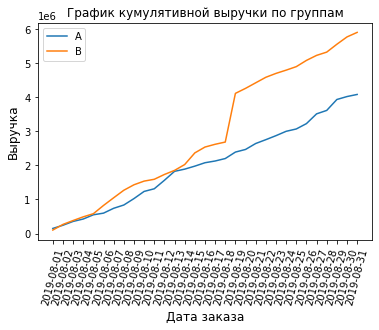

In [5]:
register_matplotlib_converters()

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим графики выручки групп А и B
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата заказа', fontsize='large', color='black')
plt.xticks(rotation = 75)
plt.ylabel('Выручка', fontsize='large', color='black')
plt.title('График кумулятивной выручки по группам')
plt.legend();

Выручка почти равномерно увеличивается в течение всего теста.
Однако график выручки группы B в одной точке резко растет. 
Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### График кумулятивного среднего чека по группам

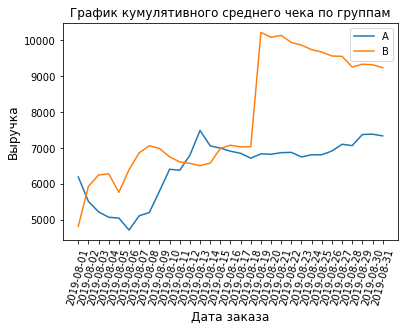

In [6]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата заказа', fontsize='large', color='black')
plt.xticks(rotation = 75)
plt.ylabel('Выручка', fontsize='large', color='black')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

Средний чек тоже становится равномерным в конце теста: для группы B незначительно дороже. Возможно, в группы  попали крупные заказы (резкие всплески на графике).

### График относительного изменения кумулятивного среднего чека группы B к группе A

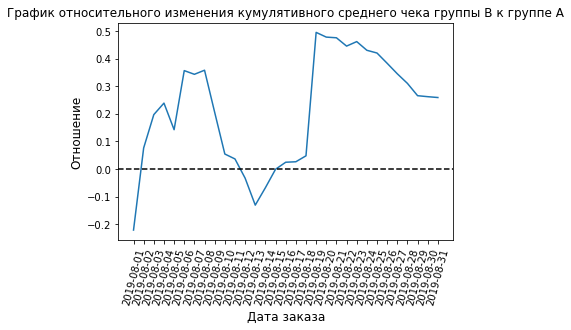

In [7]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');


plt.xlabel('Дата заказа', fontsize='large', color='black')
plt.xticks(rotation = 75)
plt.ylabel('Отношение', fontsize='large', color='black')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');

В нескольких точках график различия между сегментами резко скачет, что сигнализирует о крупных заказах и выбросах.

### График кумулятивной конверсии по группам

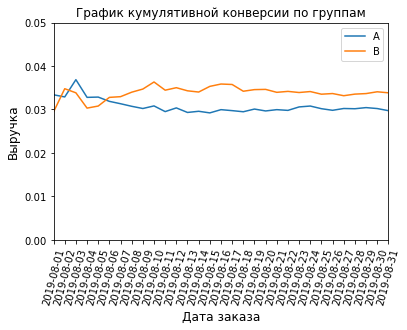

In [8]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0, 0.05])

plt.xlabel('Дата заказа', fontsize='large', color='black')
plt.xticks(rotation = 75)
plt.ylabel('Выручка', fontsize='large', color='black')
plt.title('График кумулятивной конверсии по группам');

Конверсия группы B вырвалась вперёд и зафиксировалась, а конверсия группы A зафиксировалась в одной точке в первой половине теста.

### График относительного различия кумулятивных конверсий

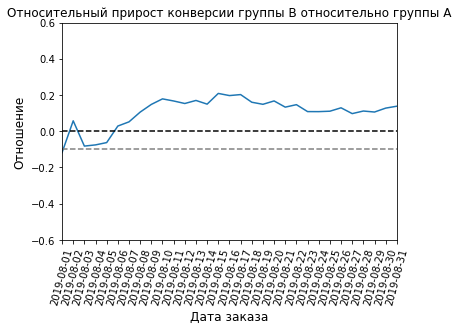

In [9]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.6, 0.6])

plt.xlabel('Дата заказа', fontsize='large', color='black')
plt.xticks(rotation = 75)
plt.ylabel('Отношение', fontsize='large', color='black')
plt.title('Относительный прирост конверсии группы B относительно группы A');

В начале теста группа B значительно проигрывала группе A, но в первой половине теста вырвалась вперёд. 

### Точечный график количества заказов по пользователям

       visitorid  transactionid
1023  4256040402             11
591   2458001652             11
569   2378935119              9
487   2038680547              8
44     199603092              5
744   3062433592              5
55     237748145              5
917   3803269165              5
299   1230306981              5
897   3717692402              5


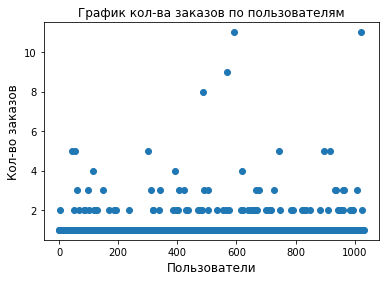

In [10]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['visitorid', 'transactionid']

print(ordersByUsers.sort_values(by='transactionid', ascending=False).head(10)) 

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactionid'])
plt.xlabel('Пользователи', fontsize='large', color='black')
plt.ylabel('Кол-во заказов', fontsize='large', color='black')
plt.title('График кол-ва заказов по пользователям');

Много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

### Расчет 95-го и 99-го перцентиля количества заказов на пользователя

In [11]:
print(np.percentile(ordersByUsers['transactionid'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформляли больше, чем 2 заказа. И 1% пользователей заказывали более четырех раз.
Разумно выбрать 4 заказа на одного пользователя за верхнюю границу числа заказов.

### Точечный график стоимостей заказов

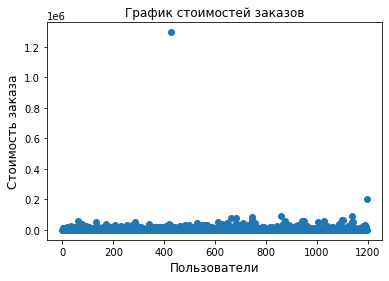

In [12]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Пользователи', fontsize='large', color='black')
plt.ylabel('Стоимость заказа', fontsize='large', color='black')
plt.title('График стоимостей заказов');

Есть немного дорогих заказов

### Расчет 95-го и 99-го перцентиля стоимости заказов

In [13]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей.

### Статистическая значимость различий в конверсии между группами по «сырым» данным

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: есть различия в среднем количестве заказов между группами.

In [14]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [15]:
# cоздаю переменные ordersByUsersA и ordersByUsersB
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'transactionid'] 

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'transactionid'] 

In [16]:
sampleA = pd.concat([ordersByUsersA['transactionid'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionid'])), name='transactionid')],axis=0)
sampleB = pd.concat([ordersByUsersB['transactionid'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionid'])), name='transactionid')],axis=0)

In [17]:
# выведем относительный прирост среднего числа заказов группы B
import scipy.stats as stats
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'transactionid']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'transactionid']

sampleA = pd.concat(
    [
        ordersByUsersA['transactionid'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionid'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['transactionid'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionid'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


P-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 13.8%

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [18]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B значительно выше среднего чека группы A.

### Cтатистическая значимость различий в конверсии между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [19]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionid'] > 2]['visitorid'],
        ordersByUsersB[ordersByUsersB['transactionid'] > 2]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorid, dtype: int64
74


Итого: 74 аномальных пользователя.

In [20]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['transactionid'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionid'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['transactionid'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionid'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.013
0.173


Нулевая гипотеза не подтвердилась. Есть разница в колличестве заказов между группами

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [21]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.738
-0.020


P-value не изменился, но разница между сегментами сократилась с 26% до 2%.

## Вывод
### Предобработка данных
    Количество групп А и В равное
    В группе В пользователей было больше и принял решение оставить дублирующихся в группах пользователей, т.к. они делали покупки обеих группах.
    Пропусков в датасетах нет
### Приоритизация гипотез
##### Применение фреймворка ICE:
Наиболее перспективные гипотезы: 8, 0, 7, 6
##### Применение фреймворка RICE:
Наиболее перспективные гипотезы: 7, 2, 0, 6. 
В данном случае на первом месте гипотеза №7, так получилось по причине высокого параметра Reach = 10, у других параметров он меньше.

### Анализ A/B-теста

    Нет статистически значимого различия по среднему количеству заказов между группами по «сырым», различия появиловь после фильтрации аномалий;
    Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
    График различия конверсии между группами сообщает, что результаты группы A хуже группы B и нет значительной тенденции к улучшению.

    Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Продолжать смысла нет, потому как высока вероятнось, что при имеющихся данных сегмент B на самом деле лучше сегмента A.
